# Pipeline for Adding `+` Operator to Model Dataset

## Preproccessing Pipeline and Display

In [7]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math


# Consider adding noise removal: https://stackoverflow.com/questions/62042172/how-to-remove-noise-in-image-opencv-python 
# @TODO Create pipeline for only contouring a single image at a time and multiple
#
# @brief Searches for contours inside image, the last contuor detected is returned.
# @returns The pipeline returns the original digit with bounding box placed around it and also the contoured image.
def preprocess_pipeline(img):

  # Create Grayscale Copy and apply contours
  grey = cv2.cvtColor(img.copy(), cv2.COLOR_BGR2GRAY)
  ret, thresh = cv2.threshold(grey.copy(), 75, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
  contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  bounded_img = None
  processed_digit = None

  for c in contours:
    x,y,w,h = cv2.boundingRect(c)
    
    # Creating a rectangle around the digit in the original image (for displaying the digits fetched via contours)
    cv2.rectangle(img, (x,y), (x+w, y+h), color=(0, 255, 0), thickness=2)

    # Save copy of bounded image
    bounded_img = img
    
    # Cropping out the digit from the image corresponding to the current contours in the for loop
    digit = thresh[y:y+h, x:x+w]
    
    # @todo create a ratio to better square a general image
    # CHANGE NARROW OBJECTS TO SOON BE (18,18) PIXEL DIGIT
    # HAND SCENARIO WHEN IMAGE IS NARROW; y pixel length is less than 10 pixels
    x, y = digit.shape

    padded_digit = digit.copy() # WHY THIS HERE

    if (y < 10):
        # Padd x-axis
        difference = round((28 - y)/2)
        padded_digit = np.pad(padded_digit, ((0,0),(difference,difference)),"constant", constant_values=0)

    # Resize digit
    resized_digit = cv2.resize(padded_digit, (18,18))
    
    # Padding the digit with 5 pixels of black color (zeros) in each side to finally produce the image of (28, 28)
    padded_digit = np.pad(resized_digit, ((5,5),(5,5)), "constant", constant_values=0)
    
    # Update image argument with processed form
    processed_digit = padded_digit

  return bounded_img, processed_digit


# @TODO Consider new printing format since errors occur for certain
#         lengths and images display too large.
def display_list_of_images(images_list):
  columns = 4

  # if less than 10 images doesn't seem to print correctly
  rows = math.ceil( len(images_list) / columns)

  fig = plt.figure(figsize=(13,13))

  for i in range(1, rows*columns - 1):
    # Make prediction on each image before plotting
    # prediction = model.predict(preprocessed_digits[i-1].reshape(1, 28, 28, 1))
    p = fig.add_subplot(rows, columns, i)
    # plt.xlabel('PREDICTION: {0}'.format(np.argmax(prediction)), fontsize=30)    
    plt.imshow(images_list[i - 1], cmap='gray')

  plt.show()



# Save list of images to a specific folder
# DOUBLE CHECK THIS METHOD BEFORE RUNNING AGAIN
# maybe do read, rotate save images
def read_rotate_save_images(images_folder, save_path, rotation, num_digits_return = 0):
  image_file_names = os.listdir(images_folder)

  # Create string of rotation to add to file name
  rotatation_str = ""
  if (rotation == 0):
    rotatation_str = "_c90"
  elif (rotation == 1):
      rotatation_str = "_c180"
  elif (rotation == 2):
      rotatation_str = "_c270"

  # Store 'num_digits_return' to return
  rotated_digits = []

  for i in range(0,len(image_file_names) - 1):
    image = cv2.imread(images_folder+ image_file_names[i])

    # 'rotation' expected is a cv2 rotation which is an int 0-2
    # 0 is clockwise 90 degrees, 1 is 180, 2 is 90 counter clockwise
    rotated_img = cv2.rotate(image, rotation)

    if ( i < num_digits_return):
      rotated_digits.append(rotated_img)

    # Save image as its name plus how its rotated:
    # Remove file type from img name
    image_name = os.path.splitext(image_file_names[i])

    cv2.imwrite(save_path + image_name[0] + rotatation_str +".png", rotated_img)

  if (num_digits_return !=0 ):
    return rotated_digits


## Processing Kaggle Dataset 567 Images of Hand Written `+` Wymbols
- [Datatset Link](https://www.kaggle.com/datasets/sagyamthapa/handwritten-math-symbols),
"dataset/add" is directory being added to model dataset.

567
DISPLAYING FIRST 2 DIGITS


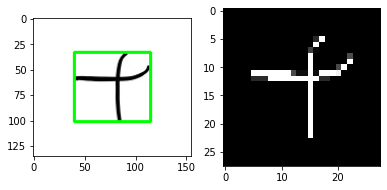

In [2]:
# GLOBALS #
ORIGINAL_IMGS_PATH = "./kaggle_dataset/add/"
IMGS_SAVE_PATH = "./kaggle_dataset/add_preproc/"
NUM_DIGITS_DISPLAY = 2


# @TODO Make the listings be in ascending order

# Get list of all file names of images in kaggle_dataset/add
image_names = os.listdir(ORIGINAL_IMGS_PATH)
print(len(image_names))

# Perform preprocessing on images from ORIGINAL_IMG_PATH
preproc_digits = []
for i in range(0,len(image_names)):
  image = cv2.imread(ORIGINAL_IMGS_PATH + image_names[i])

  # Create a image bounded from contour, then preprocess into (28, 28) image
  bounded_img, preproc_img = preprocess_pipeline(image)

  if (i < NUM_DIGITS_DISPLAY):
    preproc_digits.append(bounded_img)
    preproc_digits.append(preproc_img)

  # Save preproc image to new folder
  # save_img_to_add_preproc_dir(image_names[i],  preproc_img)
  cv2.imwrite(IMGS_SAVE_PATH + image_names[i], preproc_img)


# DISPLAYING IMAGES TO SEE OPERATION maybe display first 2?
print(f"DISPLAYING FIRST {NUM_DIGITS_DISPLAY} DIGITS")
display_list_of_images(preproc_digits)

### Create Duplicated Rotations of Preprocessed Images and Create Folder to Save Them

DISPLAYING FIRST ROTATE_90_CLOCKWISE DIGITS


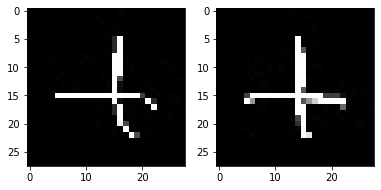

DISPLAYING FIRST ROTATE_180 DIGITS


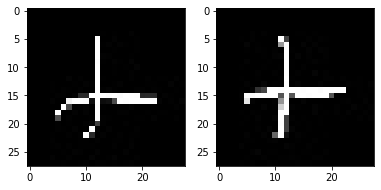

DISPLAYING FIRST ROTATE_90_COUNTERCLOCKWISE DIGITS


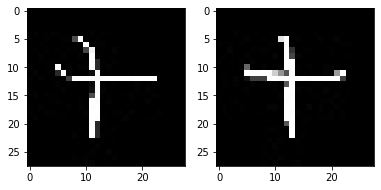

In [8]:
import os
import cv2
import math
import os
import numpy as np
import matplotlib.pyplot as plt

## GLOBALS
## Create globals for save paths
# INSURE NEW DIRECTORY IS WHATS USED FOR SAVE PATH
ROTATED_IMAGES_SAVE_PATH = "./full_+_preprocessed/"
PREPROCESSED_IMAGES_PATH = "./kaggle_dataset/add_preproc/"
NUM_DIGITS_DISPLAY = 2

# Create folder to store rotated images:
try: 
  os.mkdir(ROTATED_IMAGES_SAVE_PATH)
except:
  pass

# Create duplicate rotations of a folder and save rotated images
rotation_list = [cv2.ROTATE_90_CLOCKWISE, cv2.ROTATE_180, cv2.ROTATE_90_COUNTERCLOCKWISE]
rotation_names = ["ROTATE_90_CLOCKWISE", "ROTATE_180", "ROTATE_90_COUNTERCLOCKWISE"]

for rotation in rotation_list:
  # read_rotate_save_images(images_folder, save_path, rotation, num_digits_return = 0):
  saved_images = read_rotate_save_images(PREPROCESSED_IMAGES_PATH,
    ROTATED_IMAGES_SAVE_PATH, rotation, NUM_DIGITS_DISPLAY)

  # Display 20 saved images
  print(f"DISPLAYING FIRST {rotation_names[rotation]} DIGITS")
  display_list_of_images(saved_images)


# Copy the original preprocessed digits into the newly created folder:
image_names = os.listdir(PREPROCESSED_IMAGES_PATH)

for i in range(0,len(image_names)):
  image = cv2.imread(PREPROCESSED_IMAGES_PATH + image_names[i])

  cv2.imwrite(ROTATED_IMAGES_SAVE_PATH + image_names[i], image)

## Second Processing Kaggle Dataset,5XX Images of Hand Written `+` Wymbols
- [Datatset Link](https://www.kaggle.com/datasets/michelheusser/handwritten-digits-and-operators),
"All Data/+" is directory being added to model dataset.

DISPLAYING FIRST 10 DIGITS


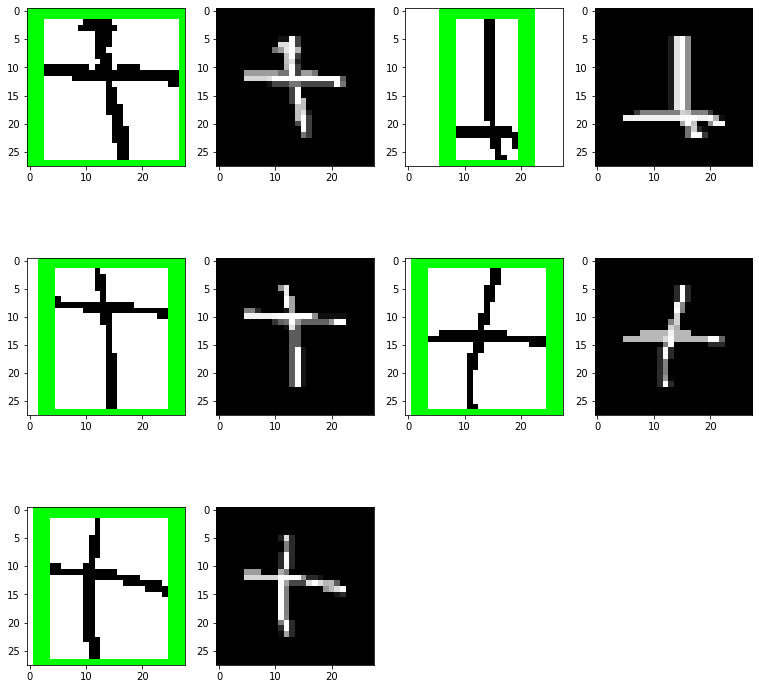

In [8]:
import re
import math
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import math

def save_img_to_add_preproc_dir(img_name, img):
  add_preproc_path = "./kaggle_dataset2/digit_original/"

  cv2.imwrite(add_preproc_path + img_name, img)


# BEGGINNING OF MAIN SCRIPT

image_names = os.listdir("./kaggle_dataset2/+")

original_digits_names = []
# fix file type extraction
regex_pattern = "[+][_][\d][_][\d]+.png"
for file in image_names:
  match = re.search(regex_pattern, file)

  if match:
    original_digits_names.append(file)


preproc_digits = []
boundeds = []
# perform 
for i in range(0,len(original_digits_names)):
  image = cv2.imread("./kaggle_dataset2/+/" + original_digits_names[i])

  # Creates copy of image then preprocesses copy
  bounded_img, preproc_img = preprocess_pipeline(image)

  preproc_digits.append(bounded_img)
  preproc_digits.append(preproc_img)

  # Save preproc image to new folder
  save_img_to_add_preproc_dir(original_digits_names[i],  preproc_img)


# DISPLAYING IMAGES TO SEE OPERATION maybe display first 8?
num_digits_display = 10
print(f"DISPLAYING FIRST {num_digits_display} DIGITS")
first_ten_digits = preproc_digits[:num_digits_display]
display_list_of_images(first_ten_digits)


## Testing on Real World Images